### ELECTRIC VEHICLE POPULATION ANALYSIS

In [53]:
import pandas as pd
import numpy as np

path = "c:\\Users\\Dell\\Documents"

file_name = "Electric_Vehicle_Population_Data.csv"

# Construct the full path to the file
file_path = f"{path}/{file_name}"

data = pd.read_csv(file_path, encoding = "latin1", delimiter = ",")

data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [54]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [55]:
data2 = data[['State', 'Electric Vehicle Type']]
data2.head()

,State,Electric Vehicle Type
0,WA,Battery Electric Vehicle (BEV)
1,WA,Battery Electric Vehicle (BEV)
2,WA,Battery Electric Vehicle (BEV)
3,WA,Battery Electric Vehicle (BEV)
4,WA,Battery Electric Vehicle (BEV)


In [56]:
data2.nunique()

State                    46
Electric Vehicle Type     2
dtype: int64

In [57]:
# Grouping data2 by 'State' and 'Electric Vehicle Type', and then counting the occurrences
subset = data2.groupby(['State', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Displaying the subset
print(subset)


   State                   Electric Vehicle Type   Count
0     AE          Battery Electric Vehicle (BEV)       1
1     AK          Battery Electric Vehicle (BEV)       1
2     AL          Battery Electric Vehicle (BEV)       5
3     AL  Plug-in Hybrid Electric Vehicle (PHEV)       1
4     AP          Battery Electric Vehicle (BEV)       1
..   ...                                     ...     ...
71    VA          Battery Electric Vehicle (BEV)      29
72    VA  Plug-in Hybrid Electric Vehicle (PHEV)      17
73    WA          Battery Electric Vehicle (BEV)  138948
74    WA  Plug-in Hybrid Electric Vehicle (PHEV)   38529
75    WY          Battery Electric Vehicle (BEV)       2

[76 rows x 3 columns]


In [58]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   State                  76 non-null     object
 1   Electric Vehicle Type  76 non-null     object
 2   Count                  76 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


In [59]:
# Pivot the DataFrame to split "Electric Vehicle Type" into two new columns
subset_pivot = subset.pivot(index='State', columns='Electric Vehicle Type', values='Count').reset_index()

# Fill any NaN values with 0
subset_pivot = subset_pivot.fillna(0)

# Rename the columns
subset_pivot.columns.name = None  # Remove the name of the columns axis
subset_pivot.columns = ['State', 'Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)']

# Display the subset with the new columns
print(subset_pivot)


   State  Battery Electric Vehicle (BEV)  \
0     AE                             1.0   
1     AK                             1.0   
2     AL                             5.0   
3     AP                             1.0   
4     AR                             2.0   
5     AZ                             8.0   
6     BC                             3.0   
7     CA                            70.0   
8     CO                             9.0   
9     CT                             2.0   
10    DC                             3.0   
11    DE                             1.0   
12    FL                             7.0   
13    GA                             4.0   
14    HI                             6.0   
15    IA                             1.0   
16    ID                             3.0   
17    IL                            12.0   
18    IN                             1.0   
19    KS                             1.0   
20    KY                             2.0   
21    LA                        

In [60]:
subset_pivot.head()

,State,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
0,AE,1.0,0.0
1,AK,1.0,0.0
2,AL,5.0,1.0
3,AP,1.0,0.0
4,AR,2.0,0.0


In [61]:
# Change data type of 'Battery Electric Vehicle (BEV)' and 'Plug-in Hybrid Electric Vehicle (PHEV)' columns to int
subset_pivot['Battery Electric Vehicle (BEV)'] = subset_pivot['Battery Electric Vehicle (BEV)'].astype(int)
subset_pivot['Plug-in Hybrid Electric Vehicle (PHEV)'] = subset_pivot['Plug-in Hybrid Electric Vehicle (PHEV)'].astype(int)


In [62]:
subset_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   State                                   46 non-null     object
 1   Battery Electric Vehicle (BEV)          46 non-null     int32 
 2   Plug-in Hybrid Electric Vehicle (PHEV)  46 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 868.0+ bytes


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [64]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [65]:
data['County'].value_counts()

County
King         92740
Snohomish    21001
Pierce       13782
Clark        10416
Thurston      6428
             ...  
Sarpy            1
Suffolk          1
Beaufort         1
Meade            1
Hardin           1
Name: count, Length: 196, dtype: int64

In [66]:
data['City'].value_counts()

City
Seattle          29447
Bellevue          8931
Redmond           6478
Vancouver         6193
Bothell           5863
                 ...  
Plymouth             1
Tempe                1
Chapel Hill          1
Vista                1
Elizabethtown        1
Name: count, Length: 723, dtype: int64

#### Data Cleaning

In [67]:
clean_data = data.copy()

In [68]:
# Drop rows with null values in 'bathrooms' and 'bedrooms' columns
clean_data = clean_data.dropna(subset=['County', 'City', 'Legislative District',
                                          'Postal Code', 'Vehicle Location', 'Electric Utility', '2020 Census Tract'])

In [69]:
clean_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [70]:
clean_data['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            138947
Plug-in Hybrid Electric Vehicle (PHEV)     38526
Name: count, dtype: int64

In [71]:
clean_data['Make'].value_counts()

Make
TESLA                   79471
NISSAN                  13984
CHEVROLET               13651
FORD                     9177
BMW                      7556
KIA                      7423
TOYOTA                   6254
VOLKSWAGEN               4993
JEEP                     4468
HYUNDAI                  4398
RIVIAN                   4307
VOLVO                    4124
AUDI                     3637
CHRYSLER                 2976
MERCEDES-BENZ            1588
PORSCHE                  1137
MITSUBISHI                957
MINI                      898
POLESTAR                  881
HONDA                     831
SUBARU                    830
FIAT                      784
DODGE                     568
MAZDA                     476
CADILLAC                  380
LEXUS                     370
SMART                     270
LINCOLN                   266
LUCID                     240
JAGUAR                    232
GENESIS                   181
LAND ROVER                 55
FISKER                     48
ALFA 

In [72]:
import matplotlib.pyplot as plt

# Data
vehicle_type_counts = clean_data['Electric Vehicle Type'].value_counts()
make_counts = clean_data['Make'].value_counts().head(10)  # Top 10 makes

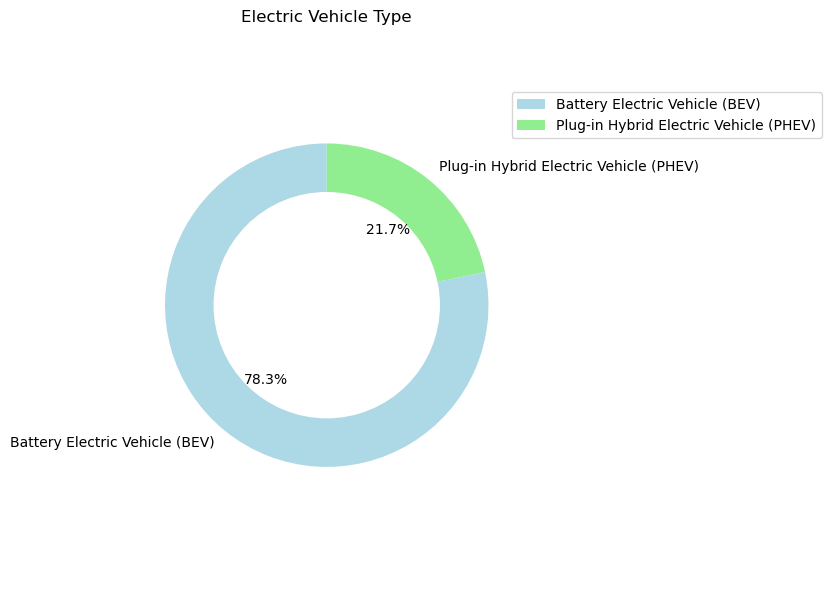

In [73]:
# Calculate percentages
percentages = (vehicle_type_counts / vehicle_type_counts.sum()) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Doughnut chart for Electric Vehicle Type
plt.subplot(1, 2, 1)
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Electric Vehicle Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a circle at the center to transform the pie chart into a doughnut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a legend with percentages
plt.legend(labels=percentages.index, loc='upper left', bbox_to_anchor=(1, 0.9))

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Count')

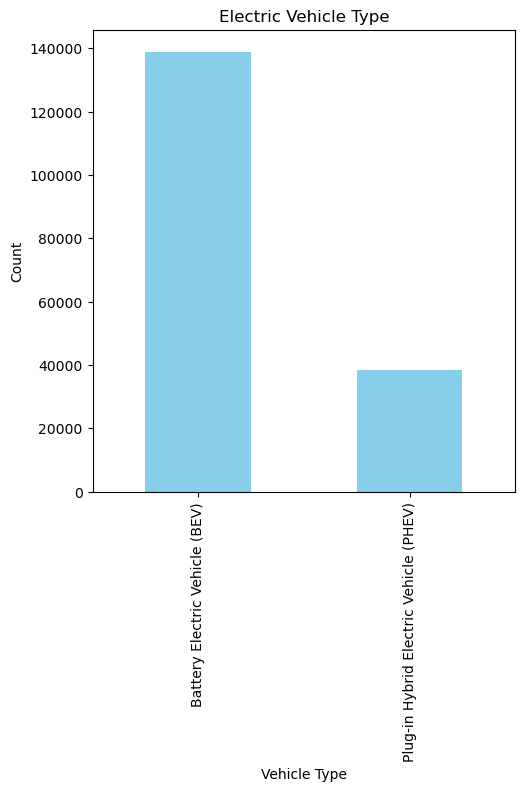

In [74]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot for Electric Vehicle Type
plt.subplot(1, 2, 1)
vehicle_type_counts.plot(kind='bar', color='skyblue')
plt.title('Electric Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')

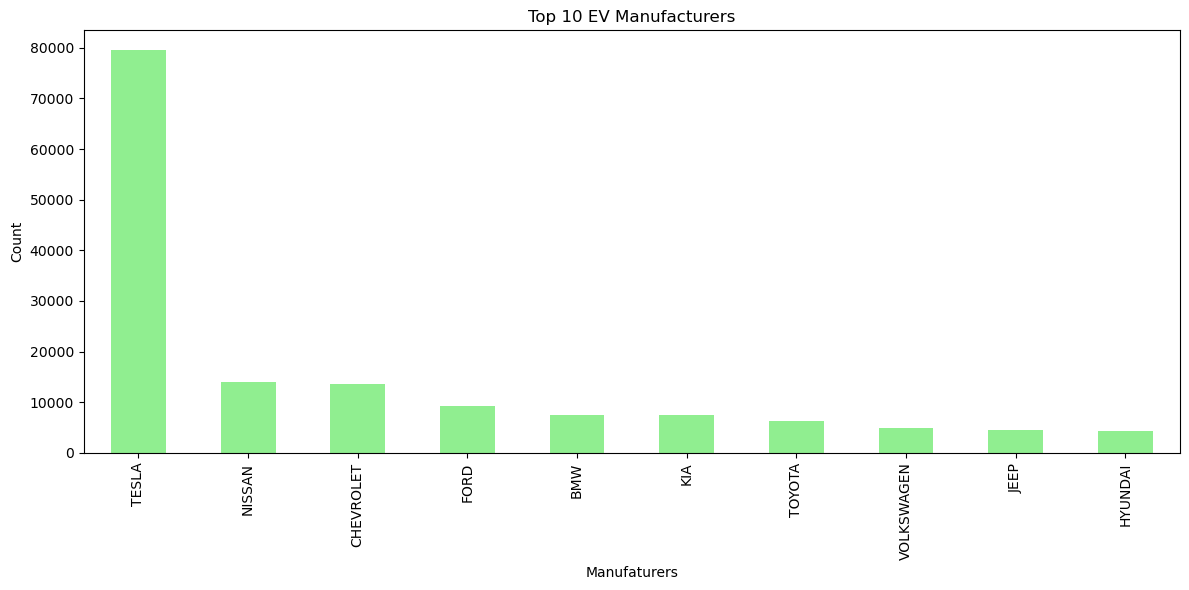

In [75]:
# Plot for Top Electric Vehicle Makes
plt.figure(figsize=(12, 6))  # Increase the chart size

make_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 10 EV Manufacturers')
plt.xlabel('Manufaturers')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


In [76]:
import seaborn as sns

# Grouping data by city and electric vehicle type and counting the number of vehicles in each group
city_vehicle_counts = clean_data.groupby(['City', 'Electric Vehicle Type']).size().unstack(fill_value=0)

In [77]:
city_vehicle_counts

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
City,,
Aberdeen,103,53
Acme,5,5
Addy,2,0
Adna,1,0
Airway Heights,16,13
...,...,...
Yacolt,40,14
Yakima,442,216
Yarrow Point,115,30


In [78]:

# Getting the cities with the highest number of vehicles for each type
top_cities_bev = city_vehicle_counts['Battery Electric Vehicle (BEV)'].nlargest(10)
top_cities_phev = city_vehicle_counts['Plug-in Hybrid Electric Vehicle (PHEV)'].nlargest(10)

In [79]:
top_cities_bev

City
Seattle      23477
Bellevue      7692
Redmond       5616
Bothell       5058
Sammamish     4614
Kirkland      4543
Vancouver     4534
Renton        3738
Olympia       3248
Tacoma        2799
Name: Battery Electric Vehicle (BEV), dtype: int64

In [80]:
top_cities_phev

City
Seattle      5970
Tukwila      1831
Vancouver    1659
Renton       1242
Bellevue     1238
Olympia      1051
Tacoma        923
Redmond       862
Kirkland      819
Spokane       818
Name: Plug-in Hybrid Electric Vehicle (PHEV), dtype: int64

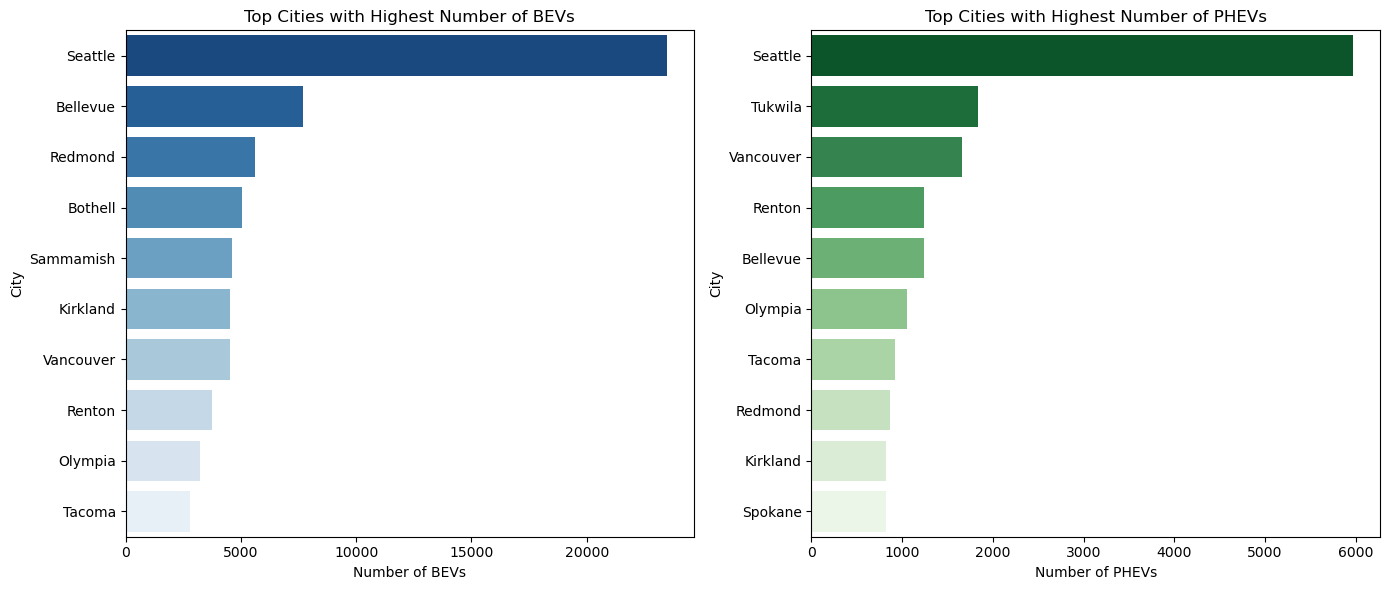

In [81]:
# Plotting
plt.figure(figsize=(14, 6))

# Plot for Battery Electric Vehicles (BEV)
plt.subplot(1, 2, 1)
sns.barplot(x=top_cities_bev.values, y=top_cities_bev.index, palette='Blues_r')
plt.title('Top Cities with Highest Number of BEVs')
plt.xlabel('Number of BEVs')
plt.ylabel('City')

# Plot for Plug-in Hybrid Electric Vehicles (PHEV)
plt.subplot(1, 2, 2)
sns.barplot(x=top_cities_phev.values, y=top_cities_phev.index, palette='Greens_r')
plt.title('Top Cities with Highest Number of PHEVs')
plt.xlabel('Number of PHEVs')
plt.ylabel('City')

plt.tight_layout()
plt.show()

In [82]:
clean_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    91790
Clean Alternative Fuel Vehicle Eligible                         66166
Not eligible due to low battery range                           19517
Name: count, dtype: int64

In [83]:
clean_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

##### Base MSRP (Manufacturer's Suggested Retail Price)
This column indicates the suggested retail price set by the manufacturer for the electric vehicle. It represents the initial price at which the manufacturer recommends selling the vehicle to consumers before any discounts, taxes, or additional fees. The value in this column reflects the cost of purchasing the vehicle from the manufacturer.


##### Electric Range
This column represents the range of the electric vehicle, which is the distance the vehicle can travel on a single charge of its battery. The unit of measurement for electric range is typically miles or kilometers. A higher value in this column indicates that the vehicle can travel a greater distance before needing to recharge its battery. Electric range is an important factor for consumers considering purchasing an electric vehicle, as it directly impacts the vehicle's usability for their daily transportation needs.

In [84]:
sub_data = clean_data[['Base MSRP', 'Electric Range']]
sub_data.head()

,Base MSRP,Electric Range
0,0,291
1,0,0
2,0,270
3,0,210
4,0,0


In [85]:
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177473 entries, 0 to 177865
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   Base MSRP       177473 non-null  int64
 1   Electric Range  177473 non-null  int64
dtypes: int64(2)
memory usage: 4.1 MB


In [86]:
sub_data.describe()

,Base MSRP,Electric Range
count,177473.000000,177473.000000
mean,1070.609839,58.826548
std,8346.920672,91.973457
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,75.000000
max,845000.000000,337.000000


In [87]:
# Assuming df is your DataFrame

(sub_data['Base MSRP'] == 0).sum()


174142

In [88]:
(sub_data['Base MSRP'] != 0).sum()

3331

In [89]:
(sub_data['Electric Range'] == 0).sum()

91790

In [90]:
sub_data = sub_data[sub_data['Base MSRP'] != 0]

In [91]:
sub_data.head()

,Base MSRP,Electric Range
30,32250,93
71,31950,93
187,69900,208
218,69900,208
293,44100,14


In [92]:
(sub_data['Electric Range'] == 0).sum()

0

In [93]:
sub_data.describe()

,Base MSRP,Electric Range
count,3331.000000,3331.000000
mean,57041.230862,121.824077
std,22793.009302,89.955389
min,31950.000000,12.000000
25%,39995.000000,17.000000
50%,59900.000000,93.000000
75%,69900.000000,208.000000
max,845000.000000,265.000000


In [94]:
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3331 entries, 30 to 177739
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Base MSRP       3331 non-null   int64
 1   Electric Range  3331 non-null   int64
dtypes: int64(2)
memory usage: 78.1 KB


In [95]:
from sklearn.preprocessing import StandardScaler

# Assuming sub_data is your DataFrame

# Initialize the StandardScaler
ss = StandardScaler()

# Fit and transform the data
sub_data = ss.fit_transform(sub_data[['Base MSRP', 'Electric Range']])

# Convert the scaled data back to a DataFrame
sub_data= pd.DataFrame(sub_data, columns=['Scaled Base MSRP', 'Scaled Electric Range'])

# Display the scaled DataFrame
print(sub_data)

      Scaled Base MSRP  Scaled Electric Range
0            -1.087831              -0.320474
1            -1.100995              -0.320474
2             0.564239               0.958129
3             0.564239               0.958129
4            -0.567857              -1.198819
...                ...                    ...
3326         -1.100995              -0.320474
3327         -1.087831              -0.320474
3328          0.564239               0.958129
3329         -0.181716              -1.165465
3330         -0.567857              -1.198819

[3331 rows x 2 columns]


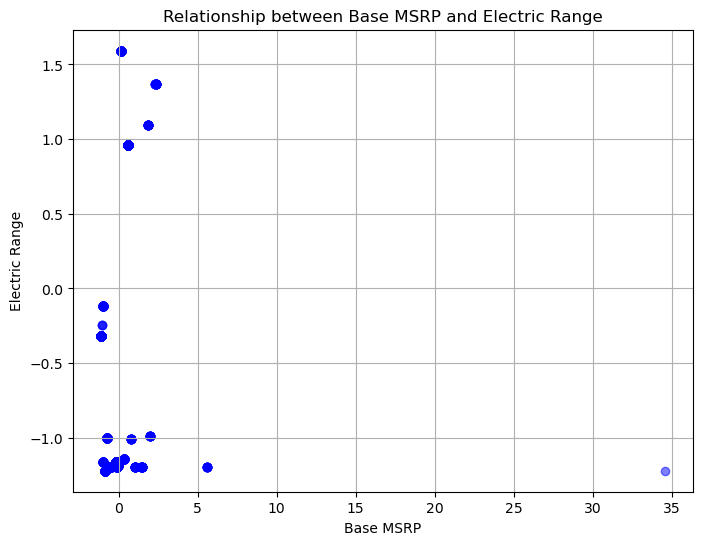

In [96]:
# Extracting data for scatter plot
Base_MSRP = sub_data['Scaled Base MSRP']
Electric_Range = sub_data['Scaled Electric Range']

# Creating the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Base_MSRP, Electric_Range, color='blue', alpha=0.5)
plt.title('Relationship between Base MSRP and Electric Range')
plt.xlabel('Base MSRP')
plt.ylabel('Electric Range')
plt.grid(True)
plt.show()

In [97]:
clean_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [98]:
data_pop = clean_data[['State', 'City', 'Vehicle Location', 'Legislative District', 'Electric Utility']]
data_pop.head()

,State,City,Vehicle Location,Legislative District,Electric Utility
0,WA,Seattle,POINT (-122.30839 47.610365),37.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,WA,Bothell,POINT (-122.179458 47.802589),1.0,PUGET SOUND ENERGY INC
2,WA,Seattle,POINT (-122.34848 47.632405),36.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,WA,Issaquah,POINT (-122.03646 47.534065),5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,WA,Suquamish,POINT (-122.55717 47.733415),23.0,PUGET SOUND ENERGY INC


In [99]:
data_pop["Electric Utility"].value_counts()

Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                               65990
PUGET SOUND ENERGY INC                                                                      35882
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                31381
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                            10173
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY              7828
                                                                                            ...  
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COUNTY||INLAND POWER & LIGHT COMPANY        2
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLALLAM COUNTY|PUD NO 1 OF JEFFERSON COUNTY        1
BONNEVILLE POWER ADMINISTRATION||PENINSULA LIGHT COMPANY                                        1
CITY OF SEATTLE - (WA)                                                                          1
BON

In [100]:
# Convert 'Model Year' to string if it's an integer type
clean_data['Model Year'] = clean_data['Model Year'].astype(str)

# Exclude rows where 'Model Year' is '2024'
clean_data = clean_data[clean_data['Model Year'] != '2024']


In [101]:
# Grouping data by model year and counting the number of EVs for each year
ev_population_by_year = clean_data.groupby('Model Year').size()

ev_population_by_year


Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
dtype: int64

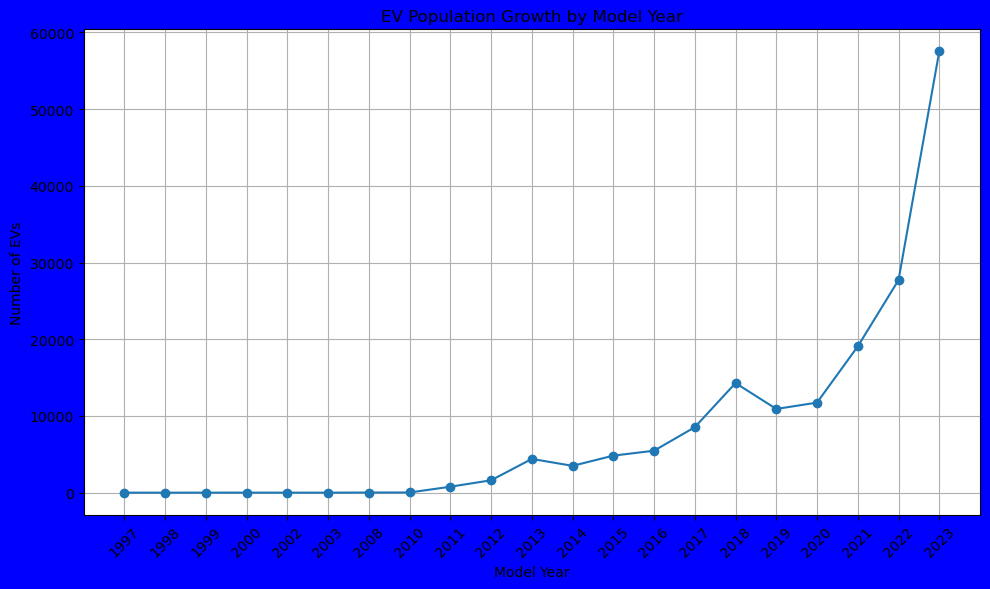

In [102]:
plt.figure(figsize=(10, 6), facecolor='#0000FF')  # Set background color to blue
plt.plot(ev_population_by_year.index, ev_population_by_year.values, marker='o', linestyle='-')
plt.title('EV Population Growth by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.grid(True)
plt.xticks(ev_population_by_year.index, rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [103]:
clean_data['Vehicle Location']

0            POINT (-122.30839 47.610365)
1           POINT (-122.179458 47.802589)
2            POINT (-122.34848 47.632405)
3            POINT (-122.03646 47.534065)
4            POINT (-122.55717 47.733415)
                       ...               
177861       POINT (-122.183805 47.18062)
177862      POINT (-123.105305 47.211085)
177863    POINT (-119.8493873 47.2339933)
177864       POINT (-122.00451 47.312185)
177865        POINT (-122.38578 47.28971)
Name: Vehicle Location, Length: 170401, dtype: object

In [104]:
#pip install folium


In [105]:
#pip install shapely

In [106]:
import folium
from shapely.geometry import Point

# Function to extract latitude from the 'Vehicle Location' column
def extract_latitude(point_str):
    return float(point_str.split()[1][1:])

# Function to extract longitude from the 'Vehicle Location' column
def extract_longitude(point_str):
    return float(point_str.split()[2][:-1])

In [107]:
# Apply the functions to create 'Latitude' and 'Longitude' columns
clean_data['Latitude'] = clean_data['Vehicle Location'].apply(extract_latitude)
clean_data['Longitude'] = clean_data['Vehicle Location'].apply(extract_longitude)

# Display the DataFrame to check the new columns
print(clean_data[['Latitude', 'Longitude']])

          Latitude  Longitude
0      -122.308390  47.610365
1      -122.179458  47.802589
2      -122.348480  47.632405
3      -122.036460  47.534065
4      -122.557170  47.733415
...            ...        ...
177861 -122.183805  47.180620
177862 -123.105305  47.211085
177863 -119.849387  47.233993
177864 -122.004510  47.312185
177865 -122.385780  47.289710

[170401 rows x 2 columns]


In [108]:
import os

# Get the current working directory
current_directory = "c:\\Users\\Dell\\Documents"

# Define the filename
filename = 'EV_distribution_map.html'

# Join the current directory with the filename
map_location = os.path.join(current_directory, filename)


In [109]:
# Drop rows with missing latitude or longitude values
clean_data = clean_data.dropna(subset=['Latitude', 'Longitude'])

# Initialize the map
map = folium.Map(location=[clean_data['Latitude'].mean(), clean_data['Longitude'].mean()], zoom_start=5)

# Add markers for each EV location
for index, row in clean_data.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']]).add_to(map)

# Save the map at the specified location
map.save(map_location)

# Print the location of the saved map
print("Map saved at:", map_location)

Map saved at: c:\Users\Dell\Documents\EV_distribution_map.html


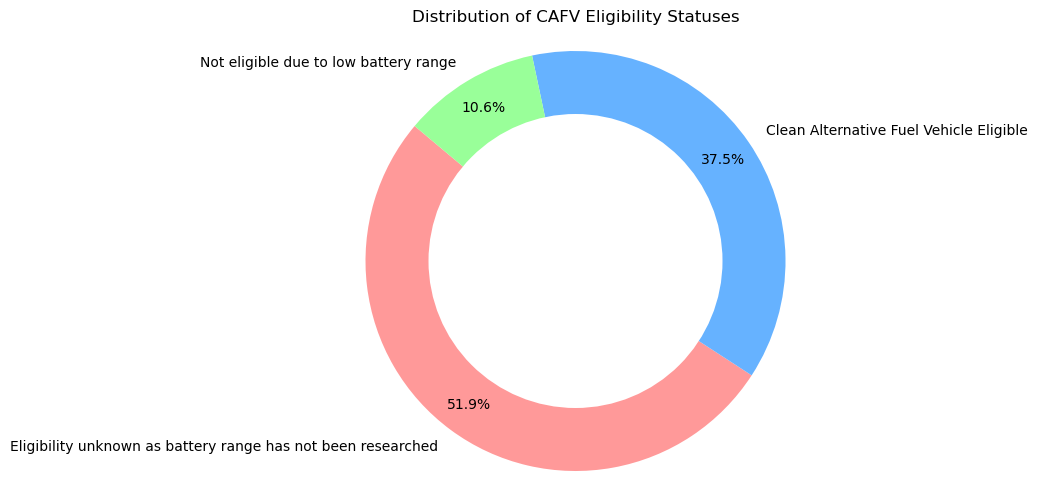

In [110]:
# Count the number of each CAFV eligibility status
eligibility_counts = clean_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Create labels and sizes for the pie chart
labels = eligibility_counts.index
sizes = eligibility_counts.values

# Create the outer pie chart
plt.figure(figsize=(8, 6))
outer_colors = ['#FF9999', '#66B2FF', '#99FF99']  # Colors for each section
plt.pie(sizes, labels=labels, colors=outer_colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85)  # Set pctdistance to create space for the inner circle

# Create the inner circle (donut hole)
inner_circle = plt.Circle((0, 0), 0.70, fc='white')  # Adjust the size (0.70) to change the size of the hole
plt.gca().add_artist(inner_circle)

plt.title('Distribution of CAFV Eligibility Statuses')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()
